In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 점포수 데이터 시각화

In [2]:
df = pd.read_csv("jumposu_younghyun", encoding="cp949")
df.head(2)

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,시군구명,행정동_코드,행정동명
0,2021,1,2110001,이북5도청사,한식음식점,10,11,0,0,1,종로구,11110560,평창동
1,2021,1,2110001,이북5도청사,분식전문점,3,3,0,0,0,종로구,11110560,평창동


In [3]:
#시각화를 위한 변수 임의 지정하기
시군구 = np.random.choice(df["시군구명"].unique())
행정동 = np.random.choice(df.loc[df["시군구명"]==시군구,"행정동명"].unique())
업종 = np.random.choice(df["서비스_업종_코드_명"].unique())

In [4]:
df_choice1 = df[(df["시군구명"]==시군구)]
df_choice2 = df[(df["시군구명"]==시군구) & (df["행정동명"]==행정동)]
df_choice3 = df[(df["시군구명"]==시군구) & (df["행정동명"]==행정동) & (df["서비스_업종_코드_명"]==업종)]

In [5]:
#고른 행정동의 총 점포수
j_no = df[(df["시군구명"]==시군구) & (df["행정동명"]==행정동)]["점포_수"].sum()
# 고른 행정동의 프랜차이즈와 일반 점포수 비교
p_no = df[(df["시군구명"]==시군구) & (df["행정동명"]==행정동)]["프랜차이즈_점포_수"].sum()

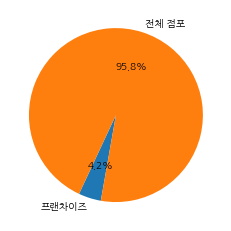

In [6]:
piechart = [p_no,j_no-p_no]

#j_no가 1일때 P_no의 비율
ratio = piechart
labels = ['프랜차이즈', '전체 점포']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

<AxesSubplot:xlabel='기준_분기_코드', ylabel='점포_수'>

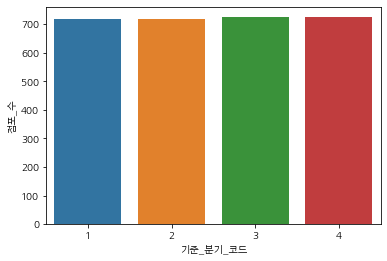

In [7]:
# 행정동별 점포수 추이 (변화 크지 않음))
sns.barplot(data=df_choice2, x="기준_분기_코드", y="점포_수", estimator=np.sum, ci=None)

[Text(0.5, 1.0, '시군구별 총 점포수 개수')]

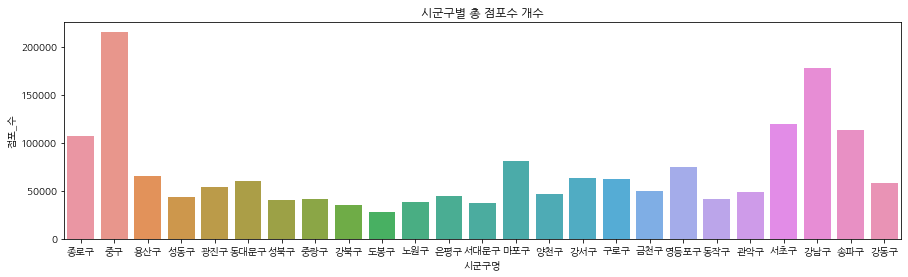

In [8]:
#구별 점포수
plt.figure(figsize=(15,4))
sns.barplot(data=df, x="시군구명", y="점포_수", estimator=np.sum, ci=None).set(title='시군구별 총 점포수 개수')

<AxesSubplot:xlabel='점포_수', ylabel='서비스_업종_코드_명'>

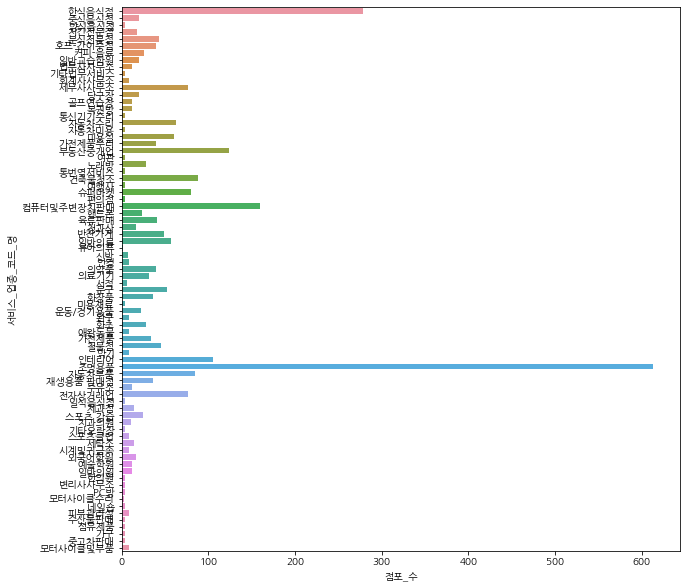

In [9]:
#행정동을 골랐을때 업종별 점포 수
plt.figure(figsize=(10,10))
sns.barplot(data=df_choice2, y="서비스_업종_코드_명", x="점포_수", estimator=np.sum, ci=None,)

# 상권코드와 지역정보 연결하기 (시군구명, 행정동명)

파일 위치 다를 수 있으므로 확인하기 dong:행정동별 상권변화지표 / gu: 건축물대장 법정동 코드정보 / sang: 상권영역

In [10]:
from glob import glob
glob("*.csv")

['rawdata_folium_checknumbers.csv',
 'rawdata_folium.csv',
 '서울시 우리마을가게 상권분석서비스(행정동별 상권변화지표).csv',
 'rawdata_folium_1022_1.csv',
 'seoul_numberofjumpo_2021.csv',
 'seoul_점포수_행정동별_좌표_df.csv',
 'seoul_업종_점포수_행정동별_좌표포함.csv',
 '행정동_시군구연결_중복제거.csv',
 '서울시_행정동_중심점_2017.csv',
 'rawdata_folium_1021.csv',
 'rawdata_folium1_1021.csv',
 'seoul_rawdata_for_folium.csv',
 '상권코드별_행정동명.csv',
 '서울시 건축물대장 법정동 코드정보.csv',
 'rawdata_folium_1022.csv',
 '서울시 우리마을가게 상권분석서비스(상권영역).csv']

In [11]:
gu = glob('서울시 건축물대장 법정동 코드정보.csv')[0]
dong = glob('서울시 우리마을가게 상권분석서비스(행정동별 상권변화지표).csv')[0]
sang = glob('서울시 우리마을가게 상권분석서비스(상권영역).csv')[0]

In [12]:
df_gu = pd.read_csv(gu, encoding="cp949")
df_dong = pd.read_csv(dong, encoding="cp949")
df_sang = pd.read_csv(sang, encoding="cp949")

In [13]:
df_gu.shape

(2352, 9)

In [14]:
df_gu.head(2)

,시군구코드,법정동코드,행정동코드,시도명,시군구명,법정동명,행정동명,적용시작일,적용만료일
0,11740,10300,526,서울특별시,강동구,상일동,상일제2동,20210701,99991231
1,11740,10300,525,서울특별시,강동구,상일동,상일제1동,20210701,99991231


In [15]:
#df_gu에 행정동명이 결측치가 1112개라서 df_dong은 새로운 데이터셋을 이용하였음
df_gu.isnull().sum()

시군구코드       0
법정동코드       0
행정동코드       0
시도명         0
시군구명        1
법정동명        0
행정동명     1112
적용시작일       0
적용만료일       0
dtype: int64

In [16]:
df_dong.shape

(14416, 10)

In [17]:
df_dong.head(2)

,기준_년_코드,기준_분기_코드,행정동_코드,행정동_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2022,2,11740700,둔촌2동,HL,상권축소,123,52,121,55
1,2022,2,11740690,둔촌1동,HH,정체,180,72,121,55


In [18]:
df_sang.shape

(1671, 10)

In [19]:
df_sang.head(2)

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934,438813,11545,11545710,NaN
1,202112,A,골목상권,2110427,노원 을지대학교병원,206265,459431,11350,11350611,NaN


In [20]:
#데이터 타입 확인
df_gu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구코드   2352 non-null   int64 
 1   법정동코드   2352 non-null   int64 
 2   행정동코드   2352 non-null   int64 
 3   시도명     2352 non-null   object
 4   시군구명    2351 non-null   object
 5   법정동명    2352 non-null   object
 6   행정동명    1240 non-null   object
 7   적용시작일   2352 non-null   int64 
 8   적용만료일   2352 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 165.5+ KB


In [21]:
df_gu["시군구코드"] = df_gu["시군구코드"].astype(str)
df_gu["행정동코드"] = df_gu["행정동코드"].astype(str)

In [22]:
#행정동 코드 번호를 맞추기 위해 문자열 합치기
df_gu["행정동코드"] = df_gu["시군구코드"].str.cat(df_gu["행정동코드"]).astype(int)

In [23]:
#사용할 컬럼만 새로운 데이터프레임에 담기
df_gu1 = df_gu[["행정동코드","시군구명"]]

In [24]:
df_dong1 = df_dong[["행정동_코드","행정동_코드_명"]]
df_dong1

,행정동_코드,행정동_코드_명
0,11740700,둔촌2동
1,11740690,둔촌1동
2,11740685,길동
3,11740660,성내3동
4,11740650,성내2동
...,...,...
14411,11110560,평창동
14412,11110550,부암동
14413,11110540,삼청동
14414,11110530,사직동


In [25]:
df_dong1.columns = ["행정동코드","행정동명"]

In [26]:
# 연결할 기준 칼럼
df_sang.head()

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934,438813,11545,11545710,NaN
1,202112,A,골목상권,2110427,노원 을지대학교병원,206265,459431,11350,11350611,NaN
2,202112,A,골목상권,2110755,동일여자고등학교,192300,439070,11545,11545680,NaN
3,202112,A,골목상권,2110739,시흥3동 우편취급국,191289,438014,11545,11545690,NaN
4,202112,A,골목상권,2111017,송파나루역 3번,210222,445516,11710,11710562,NaN


In [27]:
df_sang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년월_코드    1671 non-null   int64  
 1   상권_구분_코드    1671 non-null   object 
 2   상권_구분_코드_명  1671 non-null   object 
 3   상권_코드       1671 non-null   int64  
 4   상권_코드_명     1671 non-null   object 
 5   엑스좌표_값      1671 non-null   int64  
 6   와이좌표_값      1671 non-null   int64  
 7   시군구_코드      1671 non-null   int64  
 8   행정동_코드      1671 non-null   int64  
 9   형태정보        0 non-null      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 130.7+ KB


In [28]:
# merge로 필요한 df column 합치기
df_new = df_dong1.merge(df_gu1, on="행정동코드", how="left")
df_new

,행정동코드,행정동명,시군구명
0,11740700,둔촌2동,강동구
1,11740700,둔촌2동,강동구
2,11740690,둔촌1동,강동구
3,11740685,길동,강동구
4,11740660,성내3동,강동구
...,...,...,...
26345,11110515,청운효자동,종로구
26346,11110515,청운효자동,종로구
26347,11110515,청운효자동,종로구
26348,11110515,청운효자동,종로구


In [29]:
# 만든 동별 좌표를 엑스좌표 와이좌표가 있는 df과 연결
df_check = df_sang.merge(df_new, left_on="행정동_코드", right_on="행정동코드", how="left")
df_check

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보,행정동코드,행정동명,시군구명
0,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934,438813,11545,11545710,NaN,11545710,시흥5동,금천구
1,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934,438813,11545,11545710,NaN,11545710,시흥5동,금천구
2,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934,438813,11545,11545710,NaN,11545710,시흥5동,금천구
3,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934,438813,11545,11545710,NaN,11545710,시흥5동,금천구
4,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934,438813,11545,11545710,NaN,11545710,시흥5동,금천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130963,202112,U,관광특구,1001491,이태원 관광특구,199503,448326,11170,11170650,NaN,11170650,이태원1동,용산구
130964,202112,U,관광특구,1001491,이태원 관광특구,199503,448326,11170,11170650,NaN,11170650,이태원1동,용산구
130965,202112,U,관광특구,1001491,이태원 관광특구,199503,448326,11170,11170650,NaN,11170650,이태원1동,용산구
130966,202112,U,관광특구,1001491,이태원 관광특구,199503,448326,11170,11170650,NaN,11170650,이태원1동,용산구


In [30]:
#사용하지 않을 컬럼 삭제
df_check = df_check.drop(columns = "형태정보")

In [31]:
# 파일로 저장하기
# df_check.to_csv("상권코드별_행정동명.csv", index=False)

# Folium 지도 시각화를 위한 행정동별 좌표 데이터 연결하기
기존 df_check에 담겨있는 좌표가 위도/경도 좌표체계가 달라 사용할 수 없었음
행정동별 위도 경도 파일을 찾아 좌표를 연결하게 되었음

In [32]:
df1 = pd.read_csv('rawdata_jumposu_2021')

In [33]:
df1.head(1)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,...,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,엑스좌표_값,와이좌표_값,시군구_코드,시군구명,행정동_코드,행정동명
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,10,11,...,0,0,0,1,196193,456641,11110,종로구,11110560,평창동


In [34]:
file = "서울시_행정동_좌표.xlsx"
df2 = pd.read_excel(file)

In [35]:
df2.head(1)

,code,sido,gu,dong,lat,lng
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626


In [36]:
# 확인해보니 코드가 같은데 뒤에 '00'이 붙어있음 -> 제거
df2[df2["dong"] == "평창동"]

,code,sido,gu,dong,lat,lng
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
506,1111018300,서울특별시,종로구,평창동,37.610420,126.969837


In [37]:
df2.dtypes

code      int64
sido     object
gu       object
dong     object
lat     float64
lng     float64
dtype: object

In [38]:
# 문자열 인덱싱을 위해 데이터타입 변경 후 슬라이싱
df2 = df2.astype({'code':'str'})
df2["code"] = df2["code"].str[0:8].astype(int)

In [39]:
df2.columns = ["행정동_코드",'시','시군구명','행정동명1','위도','경도']

In [40]:
df3 = df2[["행정동_코드","행정동명1","위도","경도"]]

In [41]:
# 결측치가 생겨서 수동 작업으로 채웠음
# 공백이 생기는 값을 확인해서 merge전으로 돌려서 직접 df3에 추가해서 합칠 예정
# df[df['행정동명1'].isnull()]["행정동명"].unique()

In [42]:
#df3의 결측치를 채울 df4를 손수 만들어서 concat으로 합치기
df4 = pd.DataFrame([[11305610, '수유1동', 37.6334, 127.0173],
                   [11305620, '수유2동', 37.6446, 127.0199],
                   [11305630, '수유3동', 37.6389, 127.0232],
                   [11305590, '번1동', 37.6378, 127.0288],
                   [11305600, '번2동', 37.6321, 127.0386],
                   [11305606, '번3동', 37.6258, 127.0466]],
                   columns = ['행정동_코드', '행정동명1', '위도', '경도'])   
df4

,행정동_코드,행정동명1,위도,경도
0,11305610,수유1동,37.6334,127.0173
1,11305620,수유2동,37.6446,127.0199
2,11305630,수유3동,37.6389,127.0232
3,11305590,번1동,37.6378,127.0288
4,11305600,번2동,37.6321,127.0386
5,11305606,번3동,37.6258,127.0466


In [43]:
#concat
df3 = pd.concat([df3, df4], axis = 0)

In [44]:
df3.drop_duplicates()
df3

,행정동_코드,행정동명1,위도,경도
0,11110515,청운효자동,37.584009,126.970626
1,11110530,사직동,37.575408,126.965944
2,11110540,삼청동,37.590758,126.980996
3,11110550,부암동,37.594768,126.965574
4,11110560,평창동,37.613029,126.974485
...,...,...,...,...
1,11305620,수유2동,37.644600,127.019900
2,11305630,수유3동,37.638900,127.023200
3,11305590,번1동,37.637800,127.028800
4,11305600,번2동,37.632100,127.038600


In [45]:
# 점포수 데이터와 merge
df0 = pd.merge(df1, df3, on='행정동_코드', how='left')
df0

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,...,프랜차이즈_점포_수,엑스좌표_값,와이좌표_값,시군구_코드,시군구명,행정동_코드,행정동명,행정동명1,위도,경도
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,10,11,...,1,196193,456641,11110,종로구,11110560,평창동,평창동,37.613029,126.974485
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,3,3,...,0,196193,456641,11110,종로구,11110560,평창동,평창동,37.613029,126.974485
2,2021,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,1,2,...,1,196193,456641,11110,종로구,11110560,평창동,평창동,37.613029,126.974485
3,2021,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,2,2,...,0,196193,456641,11110,종로구,11110560,평창동,평창동,37.613029,126.974485
4,2021,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,3,3,...,0,196193,456641,11110,종로구,11110560,평창동,평창동,37.613029,126.974485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299159,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300036,조명용품,14,14,...,0,205310,445727,11680,강남구,11680580,삼성1동,삼성1동,37.514315,127.062824
299160,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300038,자동차부품,10,10,...,0,205310,445727,11680,강남구,11680580,삼성1동,삼성1동,37.514315,127.062824
299161,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300041,예술품,10,10,...,0,205310,445727,11680,강남구,11680580,삼성1동,삼성1동,37.514315,127.062824
299162,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300042,주유소,1,1,...,0,205310,445727,11680,강남구,11680580,삼성1동,삼성1동,37.514315,127.062824


In [46]:
# 결측치 확인
df0.isnull().sum()

기준_년_코드        0
기준_분기_코드       0
상권_구분_코드       0
상권_구분_코드_명     0
상권_코드          0
상권_코드_명        0
서비스_업종_코드      0
서비스_업종_코드_명    0
점포_수           0
유사_업종_점포_수     0
개업_율           0
개업_점포_수        0
폐업_률           0
폐업_점포_수        0
프랜차이즈_점포_수     0
엑스좌표_값         0
와이좌표_값         0
시군구_코드         0
시군구명           0
행정동_코드         0
행정동명           0
행정동명1          0
위도             0
경도             0
dtype: int64

In [47]:
# df0에서 Folium에 사용할 열만 가져와서 df에 담기, 저장
df = df0[['서비스_업종_코드', '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_점포_수',
     '폐업_점포_수', '프랜차이즈_점포_수', '시군구명', '행정동명', '위도', '경도']]

## 행정동명을 기준으로 점포수를 그룹화하기

In [48]:
df.groupby("행정동명")["점포_수"].sum()

행정동명
가락1동    12571
가락2동     2599
가락본동     9834
가리봉동     3277
가산동     20687
        ...  
효창동       966
후암동      2523
휘경1동     1896
휘경2동      812
흑석동      1593
Name: 점포_수, Length: 401, dtype: int64

In [49]:
df_location = df0[["행정동_코드","행정동명","위도","경도"]].drop_duplicates()

In [50]:
df_place = pd.pivot_table(df0, values=['점포_수'], index=['행정동_코드', '서비스_업종_코드_명'],
                    aggfunc=np.sum)
#멀티 인덱스 해제
df_use = df_place.reset_index()
df_use

,행정동_코드,서비스_업종_코드_명,점포_수
0,11110515,가구,9
1,11110515,가방,21
2,11110515,가전제품,12
3,11110515,가전제품수리,4
4,11110515,게스트하우스,15
...,...,...,...
29584,11740700,한의원,20
29585,11740700,핸드폰,20
29586,11740700,호프-간이주점,53
29587,11740700,화장품,48


In [51]:
df_fol = pd.merge(df_use, df_location, on='행정동_코드', how='left')
df_fol

,행정동_코드,서비스_업종_코드_명,점포_수,행정동명,위도,경도
0,11110515,가구,9,청운효자동,37.584009,126.970626
1,11110515,가방,21,청운효자동,37.584009,126.970626
2,11110515,가전제품,12,청운효자동,37.584009,126.970626
3,11110515,가전제품수리,4,청운효자동,37.584009,126.970626
4,11110515,게스트하우스,15,청운효자동,37.584009,126.970626
...,...,...,...,...,...,...
29584,11740700,한의원,20,둔촌2동,37.530120,127.123858
29585,11740700,핸드폰,20,둔촌2동,37.530120,127.123858
29586,11740700,호프-간이주점,53,둔촌2동,37.530120,127.123858
29587,11740700,화장품,48,둔촌2동,37.530120,127.123858


In [52]:
파일로 저장하기
# df_fol.to_csv("rawdata_folium_1021.csv", index=False, encoding="cp949")

SyntaxError: invalid syntax (1108641825.py, line 1)

# 위도, 경도 원본 데이터의 오류로 데이터셋 대체
3번 과정에서 사용한 행정동별 좌표 데이터 원본의 좌표 오류로 다른 행정동별 좌표 데이터셋을 찾아 대체하였습니다

In [ ]:
df = pd.read_csv("rawdata_folium_1021.csv", encoding="cp949")
df.head(1)

In [ ]:
df.columns

In [ ]:
dfg = pd.read_csv("jumposu_younghyun", encoding="cp949")

In [ ]:
dfg.columns

In [ ]:
dfg = dfg[['시군구명', '행정동_코드', '행정동명']]
dfg

In [ ]:
dfg = dfg.drop_duplicates()

In [ ]:
df_new = df.merge(dfg, on="행정동_코드", how="left")

In [ ]:
df_new.columns

In [ ]:
df = df_new[["시군구명","행정동_코드","행정동명_x","서비스_업종_코드_명","점포_수","위도","경도"]]
df

In [ ]:
#사용할 데이터 이름 변경
df.columns = ["시군구명","행정동_코드","행정동명","서비스_업종_코드_명","점포_수","위도","경도"]

In [ ]:
del df["위도"]
del df["경도"]

In [ ]:
#위도 경도 데이터를 다른 데이터셋으로 교체할 것이므로 지웠음
df.columns

In [ ]:
#위도, 경도를 가져올 다른 데이터셋
df_xy = pd.read_csv("서울시_행정동_중심점_2017.csv", encoding="cp949")

In [ ]:
df_xy = df_xy[["코드","X","Y"]]

In [ ]:
# 사용할 열만 가져와서 다시 합쳐주기
df_raw = pd.merge(df, df_xy, left_on="행정동_코드",right_on="코드", how="left")
df_raw

## 중복된 코드 컬럼 삭제 후, 사용할 컬럼명을 x, y에서 위도, 경도에 맞게 바꿔주기 

In [ ]:
df_raw = df_raw.drop(columns = "코드")
df_raw.columns = ['시군구명', '행정동_코드', '행정동명', '서비스_업종_코드_명', '점포_수', '경도', '위도']
df_raw

In [ ]:
파일로 저장해서 폴리움 원본 데이터로 활용
# df_raw.to_csv("rawdata_folium_1022_1.csv", index=False, encoding="cp949")

# 폴리움 시각화
VS Code에서 작업 후 복사 붙여넣기한 코드입니다.

In [ ]:
from dataclasses import dataclass
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import koreanize_matplotlib


st.markdown("# 서울시 지도")
st.sidebar.markdown("상권분석1")


import streamlit as st 
from streamlit_folium import st_folium
import folium

# folium 넣기 전 데이터 불러오기
@st.cache
def load_data():
    df = pd.read_csv('rawdata_folium_1022_1.csv', encoding="cp949")
    return df

data_load_state = st.text('Loading data...')
df = load_data()
data_load_state.text("Done!")


#검색창 만들기
st.sidebar.header('주소선택하기')
selected_gu = st.sidebar.selectbox('구', sorted(df["시군구명"].unique()))
selected_dong = st.sidebar.selectbox('행정동', sorted(df[df["시군구명"]==selected_gu]["행정동명"].unique()))
selected_job = st.sidebar.selectbox('업종명', sorted(df[(df["시군구명"]==selected_gu) & (df["행정동명"]==selected_dong)]["서비스_업종_코드_명"].unique()))


#데이터 프레임 설정
df1 = df[(df["시군구명"]==selected_gu) & (df["서비스_업종_코드_명"]==selected_job)]
df2 = df[(df["시군구명"]==selected_gu) & (df["행정동명"]==selected_dong) & (df["서비스_업종_코드_명"]==selected_job)]


#기준 위치를 df2로 해서 행정동 기준으로 띄우기 
from folium import plugins
m = folium.Map(location=[df2["위도"].mean(), df2["경도"].mean()], zoom_start=14)



# 구역 나눠 색칠하기
import json
geo_data = json.load(open('서울_자치구_경계_2017.geojson', encoding='UTF-8'))
dfj = df.groupby(['행정동명'])["점포_수"].sum().to_frame().reset_index()
dfj['행정동명'] = dfj['행정동명'].astype(str)
folium.Choropleth(geo_data = geo_data, 
data = dfj,
columns = ('행정동명','점포_수'), key_on="feature.properties.SIG_KOR_NM",
fill_color = 'BuPu',  
legend_name = '점포수').add_to(m)



# location_data
# 마커 찍기 빈도수에 따라 circle 크기를 if문으로 조절
location_data = df1[["위도","경도"]].values[:len(df1)].tolist()
for i in df1.index:
    name = df1.loc[i, "행정동명"]
    category = df1.loc[i, "서비스_업종_코드_명"]
    jumpo = df1.loc[i, "점포_수"]
    popup = folium.Popup(f"<b>{name}</b><br>{category}</b><br>{jumpo}개", max_width=300)
    tt = f"{name} 점포수 확인하기"
    location = [df1.loc[i, "위도"], df1.loc[i, "경도"]]
    if jumpo > 100:
        size_n = 550
    elif jumpo > 50:
        size_n = 450
    elif jumpo > 20:
        size_n = 350
    elif jumpo > 10:
        size_n = 250
    else:
        size_n = 150
    folium.Circle(
            location = location,
            radius= size_n,
            fill='blue',
            popup = popup,
            tooltip = tt 
    ).add_to(m)
        
plugins.MarkerCluster(location_data).add_to(m)


#지도 띄우기
st_data = st_folium(m, width = 900)